#                           Surprise Housing Case Study 

###                                                    By
###                                               Sabyasachi Praharaj






In [184]:
# Begin with importing required python libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


import warnings

### Read &  Analyse Dataset 

In [14]:
housing = pd.read_csv(r'C:\Users\I066565\Downloads\train.csv')

In [18]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
housing.shape

(1460, 81)

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###### Removing Columns which is irrelevant and had extremely less non-null objects 

In [40]:
del housing["PoolQC"]
del housing["Alley"] 
del housing["Fence"]
del housing["MiscFeature"]
del housing["FireplaceQu"]

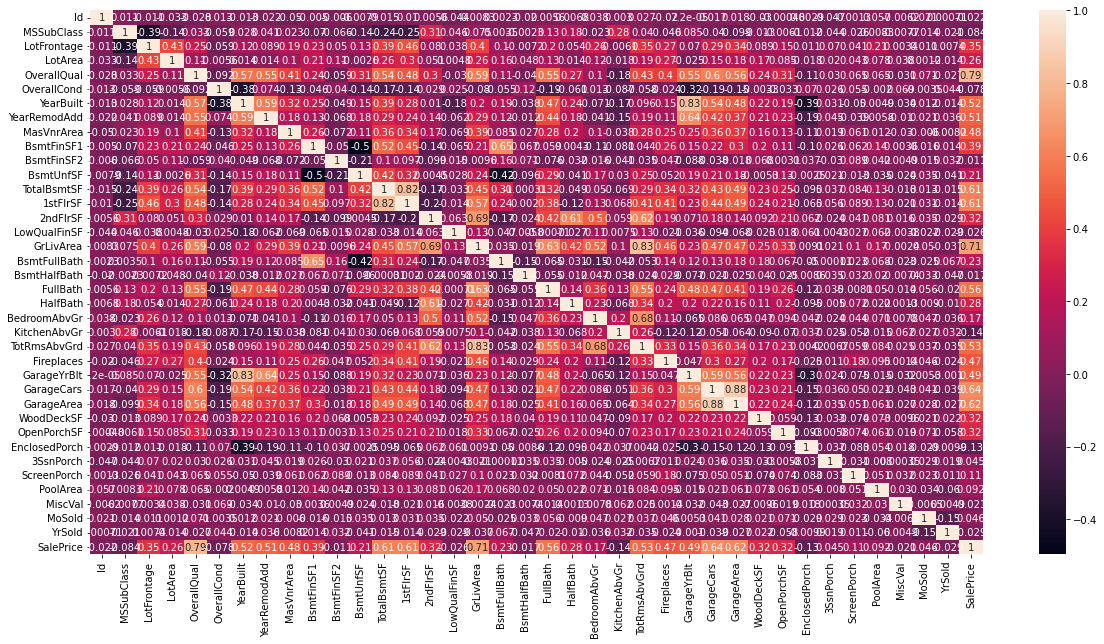

In [107]:
plt.figure(figsize = (20 , 10 ))
sns.heatmap(housing.corr(), annot=True )
plt.show()


In [71]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil


## Dummy Columns for Handling Categorical Variable

In [81]:
temp = housing[['MSZoning',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition']]           
temp = pd.get_dummies(data=temp, drop_first=True)


In [238]:
housing_new = housing

In [239]:
housing_new = housing_new.join(temp)


In [240]:
housing_new.shape

(1460, 272)

In [241]:
housing_new.drop(['MSZoning',
'Street',
'LotShape',
'LandContour','Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition'], axis=1 , inplace=True )

In [242]:
housing_new.shape

(1460, 234)

### Check if there is any column which is a string

In [268]:
housing_new.dtypes[housing_new.dtypes != 'int64'][housing_new.dtypes != 'float64'][housing_new.dtypes != 'uint8']

Series([], dtype: object)

### Null value check in all columns 


In [269]:
print(housing_new['LotFrontage'].mode())
print(housing_new['MasVnrArea'].mode())
print(housing_new['GarageYrBlt'].mode())



0    60.0
Name: LotFrontage, dtype: float64
0    0.0
Name: MasVnrArea, dtype: float64
0    2005.0
Name: GarageYrBlt, dtype: float64


#### Replacing Null values with the mode of each column. Idea is to replace the Nulls with the most commonly occuring value


In [270]:
housing_new["LotFrontage"].fillna(60.0, inplace = True)
housing_new["MasVnrArea"].fillna(0.0, inplace = True)
housing_new["GarageYrBlt"].fillna(2005, inplace = True)

In [271]:
housing_new.columns[housing_new.isna().any()].tolist()

[]

# Linear Regression 

In [272]:
df_train , df_test = train_test_split(housing_new , train_size = 0.7 , random_state = 100)

In [273]:
print(df_train.shape)
print(df_test.shape)

(1021, 234)
(439, 234)


In [274]:
y_train = df_train.pop("SalePrice")
X_train = df_train


y_test = df_test.pop("SalePrice")
X_test = df_test



In [275]:
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=233)

In [276]:
lm = LinearRegression()
lm.fit( X_train , y_train )




LinearRegression()

In [277]:
y_pred_train = lm.predict(X_train)
y_pred_test  = lm.predict(X_test)

In [278]:
lr_train_r2 = r2_score(y_train , y_pred_train)
text = "R Square for training set:" 
print(text , lr_train_r2)

lr_test_r2 = r2_score(y_test , y_pred_test)
text = "R Square for test set:" 
print(text, lr_test_r2)


R Square for training set: 0.9489188882924025
R Square for test set: 0.8253262452962964


### Linear Regression analysis :-
      1) The rsquare of training set is relatively higher than the test set .
      2) The R-square values in training and test set shows a clear case of Overfitting  .
      3) The Model is not a good model for deployement .


# RidGe Regression Model

In [195]:
params = { 'alpha': [0.0001,0.01,0.1,0.2,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,26,28,29,30,31,32,40,50,100,500]}
ridge = Ridge()
folds = 5 
model_rr = GridSearchCV(estimator = ridge,
                         param_grid = params,
                         scoring = 'neg_mean_absolute_error',
                         cv = folds,
                         return_train_score=True,
                         verbose = 1 )
model_rr.fit(X_train , y_train)


Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.01, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 20, 26, 28, 29, 30, 31, 32, 40, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [196]:
model_rr.best_params_

{'alpha': 26}

In [197]:
alpha = 26
ridge = Ridge( alpha = alpha)
ridge.fit(X_train,y_train)


Ridge(alpha=26)

In [198]:
y_pred_train_rg = ridge.predict(X_train)
y_pred_test_rg  = ridge.predict(X_test)



In [290]:
print("Ridge Model")
rg_train_r2 = r2_score(y_train , y_pred_train_rg)
ridge_text1 = "R Square(ridge) for training set:" 
print(ridge_text1 , rg_train_r2)

rg_test_r2 = r2_score(y_test , y_pred_test_rg)
ridge_text2 = "R Square(ridge) for test set:" 
print(ridge_text2, rg_test_r2)





Ridge Model
R Square(ridge) for training set: 0.8802798620458475
R Square(ridge) for test set: 0.8668363684392917


#### Analysis of Ridge Regression model
      Comparing the R-Squared Values of training and Test sets of the Ridge  findings
     
       R Square(ridge) for training set: 0.8802798620458475 approx(88%)
       R Square(ridge) for test set: 0.8668363684392917     approx(87%)
      
       the R-square value of the training set and test set seems to be approximately similar 
       Hence the Ridge Model seems to be a better fit

# LASSO Regression Model

In [200]:
lasso = Lasso()

model_ls = GridSearchCV(estimator = lasso,
                         param_grid = params,
                         scoring = 'neg_mean_absolute_error',
                         cv = folds,
                         return_train_score=True,
                         verbose = 1 )
model_ls.fit(X_train , y_train)



Fitting 5 folds for each of 33 candidates, totalling 165 fits


C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+11, tolerance: 5.304e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.186e+11, tolerance: 4.858e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+11, to

C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+11, tolerance: 5.304e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+11, tolerance: 4.858e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+11, to

C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+11, tolerance: 4.877e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.666e+10, tolerance: 5.304e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.342e+10, to

C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.948e+09, tolerance: 4.877e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+09, tolerance: 5.167e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\I066565\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+09, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.01, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 20, 26, 28, 29, 30, 31, 32, 40, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [201]:
model_ls.best_params_

{'alpha': 20}

In [202]:
alpha = 20
lasso = Lasso( alpha = alpha)
lasso.fit(X_train,y_train)

Lasso(alpha=20)

In [203]:
y_pred_train_ls = lasso.predict(X_train)
y_pred_test_ls  = lasso.predict(X_test)


In [289]:
print("Lasso Model")
ls_train_r2 = r2_score(y_train , y_pred_train_ls)
lasso_text1 = "R Square(Lasso) for training set:" 
print(lasso_text1 , ls_train_r2)

ls_test_r2 = r2_score(y_test , y_pred_test_ls)
lasso_text2 = "R Square(lasso) for test set:" 
print(lasso_text2, ls_test_r2)




Lasso Model
R Square(Lasso) for training set: 0.9381864200922839
R Square(lasso) for test set: 0.8473058583059808


#### Analysis of Lasso model
      Comparing the R-Squared Values of training and Test sets of Lasso findings
     
      R Square(Lasso) for training set: 0.9381864200922839
      R Square(lasso) for test set: 0.8473058583059808
      
      There is clear case of Overfitting in the Lasso model as well

## Lets check the model co-efficents of Various feature which were in the model 


In [280]:
coefc = pd.DataFrame(index=X_train.columns)

In [281]:
coefc.rows = X.columns

C:\Users\I066565\AppData\Local\Temp\ipykernel_8984\1846869359.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coefc.rows = X.columns


In [282]:
coefc['Ridge'] = ridge.coef_
coefc['Lasso'] = lasso.coef_

In [283]:
pd.set_option('display.max_rows',None)


In [284]:
print(coefc)

                              Ridge          Lasso
Id                        -1.111901      -0.013908
MSSubClass              -196.405082    -109.104267
LotFrontage             -126.229732      -5.453433
LotArea                    0.392208       0.493533
OverallQual            12306.958054    7946.341944
OverallCond             4980.072234    5444.855508
YearBuilt                228.440884     292.876661
YearRemodAdd             119.534087     111.363842
MasVnrArea                24.915708      20.597628
BsmtFinSF1                -0.814226      18.004122
BsmtFinSF2                 6.973149      19.990200
BsmtUnfSF                  1.414858      10.617697
TotalBsmtSF                7.573781       6.267986
1stFlrSF                  15.324612      44.756608
2ndFlrSF                  35.037275      68.778281
LowQualFinSF             -19.589907       1.544255
GrLivArea                 30.771980       8.357824
BsmtFullBath            9168.046470    5839.071658
BsmtHalfBath            1902.70

### From all the Evaluated models and the coefficents the below predictors seems to be the most important predictors 

    TotalBsmtSF
    BsmtFinSF2
    BsmtUnfSF
    LotArea
    GarageArea


